# 1. EDA


## 1.1 Set-up

In [ ]:
# Importing the main 4 libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing the Feature Engineering (FE) libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importing the Modeling Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

In [ ]:
# Importing the dataset
df = pd.read_csv('1 - Project Data.csv')

In [ ]:
# Ensuring df.head shows all the columns
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [11]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [12]:
df.shape

(7043, 31)

## 1.2 Cleaning 🧼


### 1.2.1 Null-handling

In [13]:
# Checking for nulls
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [14]:
# Checking distribution of Churn (1) vs Not Churned (0)
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

* Those that have not churned (0) have no `Churn Reason`, hence why they are null

In [15]:
# Filling the nulls with None
df['Churn Reason'] = df['Churn Reason'].fillna('None')

In [16]:
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,None
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,None
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,None
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,None
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,None


In [17]:
# Checking for nulls in Churn Reason
df['Churn Reason'].isnull().sum()

np.int64(0)

### 1.2.2 Column Types

In [18]:
# Checking data types
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

* `Total Charges` is an object but should be a float

In [19]:
# Converting the Total Charges column into floats
# If there isn't a numeric in there it will be null
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [20]:
# Checking datatypes
df['Total Charges'].dtypes

dtype('float64')

In [21]:
# Checking for any nulls in Total Charges
df['Total Charges'].isnull().sum()

np.int64(11)

In [22]:
df.loc[df['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,None
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No,0,None
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No,0,None
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No,0,None
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No,0,None
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No,0,None
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No,0,None
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No,0,None
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No,0,None
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No,0,None


* The `Tenure Months` for all of these null `Total Charges` are all 0, meaning they do not have a total charge yet**
* Therefore we will fill these nulls with **0**, to show they have no total charge

In [23]:
# Filling the nulls with 0
df['Total Charges'] = df['Total Charges'].fillna(0)

In [24]:
# Checking for nulls in Total Charges
df['Total Charges'].isnull().sum()

np.int64(0)

## 1.3 Analysis 📈

In [25]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000


### Checking for outliers 

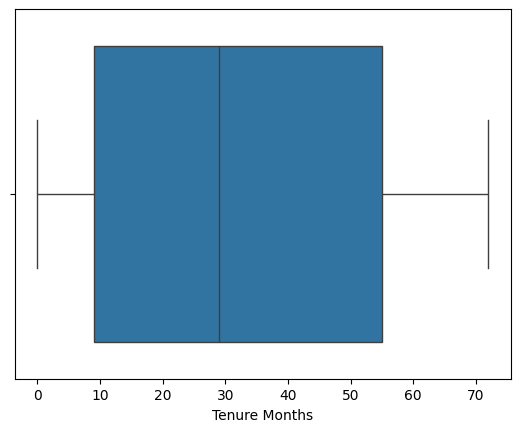

In [26]:
sns.boxplot(data = df['Tenure Months'],
            orient = 'h')

plt.show()

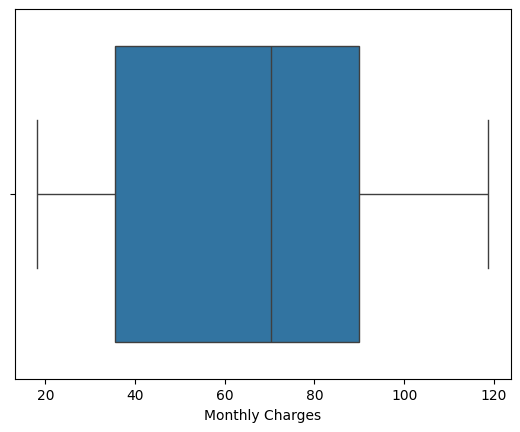

In [27]:
sns.boxplot(data = df['Monthly Charges'],
            orient = 'h')

plt.show()

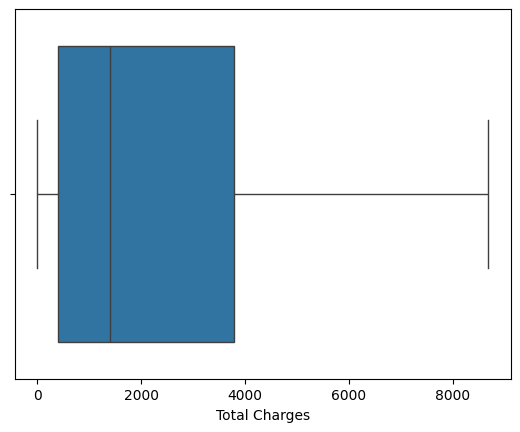

In [28]:
sns.boxplot(data = df['Total Charges'],
            orient = 'h')

plt.show()

**No outliers for these features**

### Correlations

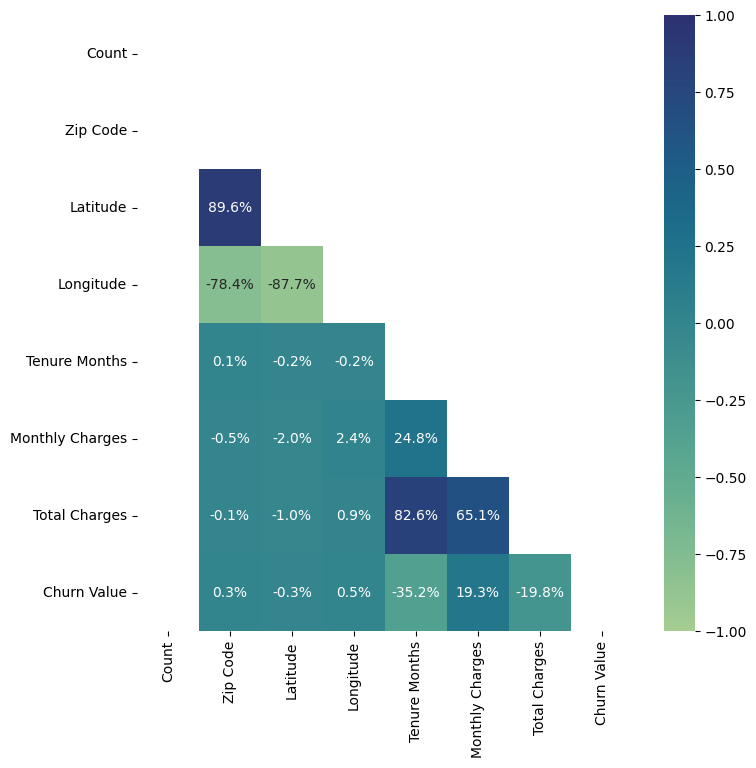

In [29]:
corre = df.corr(numeric_only = True)

plt.figure(figsize = (8,8))

sns.heatmap(data = corre,
            vmin = -1,
            vmax = +1,
            fmt = '0.1%',
            annot = True,
            mask = np.triu(corre),
            cmap = 'crest')

plt.show()

* Strong correlations between location features (latitude, longitude and Zip Code)
    * But this is expected.
* Correlations between **Total Charges** and **Tenure Months**, and **Total Charges** and **Monthly Charges**

### Churned Vs Other Features

#### Monthly and Total Charges

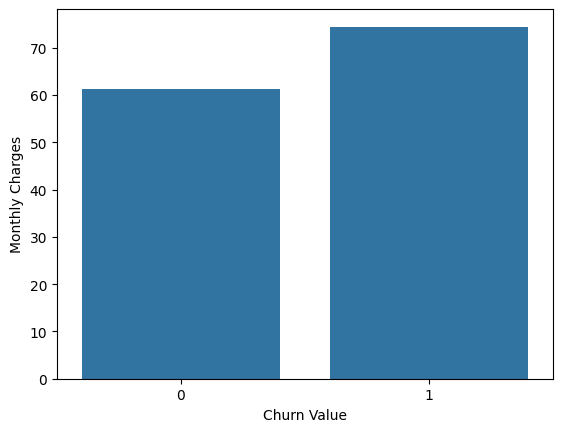

In [30]:
sns.barplot(data = df.groupby('Churn Value')[['Monthly Charges']].mean(),
           x = 'Churn Value',
           y = 'Monthly Charges')

plt.show()

* Those who have churned have **higher** average monthly charges than those who have not churned
* This could be because those who have not churned are saving more money each month, on average, than those who have churned

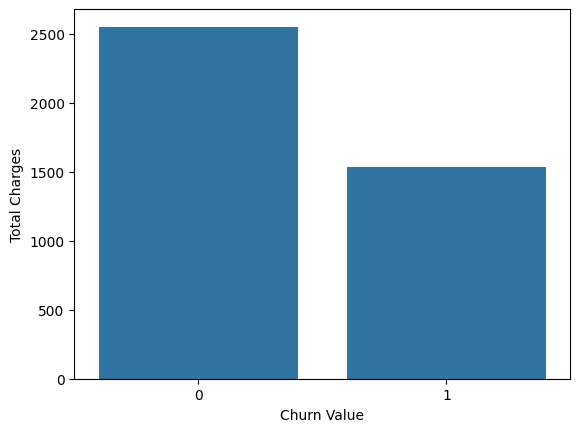

In [31]:
sns.barplot(data = df.groupby('Churn Value')[['Total Charges']].mean(),
           x = 'Churn Value',
           y = 'Total Charges')

plt.show()

* Those who have not churned have **higher** average total charges than those who have churned
* This could be due  to customer loyalty so they have had contract for longer

#### Senior Citizens

In [32]:
df.groupby(['Senior Citizen', 'Churn Value'])[['Churn Value']].count()

Churn Value
Senior Citizen Churn Value             
No             0                   4508
               1                   1393
Yes            0                    666
               1                    476

* No (5901 customers):
    * **76%** have not churned (**0**)
    * **24%** have churned (**1**)
* Yes (1142 customers):
    * **58%** have not churned (**0**)
    * **42%** have churned (**1**)
* **Senior Citizens have churned more than non-Senior Citizens (on average)**

#### Partner

In [33]:
df.groupby(['Partner', 'Churn Value'])[['Churn Value']].count()

Churn Value
Partner Churn Value             
No      0                   2441
        1                   1200
Yes     0                   2733
        1                    669

* No (3641 customers):
    * **67%** have not churned (**0**)
    * **33%** have churned (**1**)
* Yes (3402 customers):
    * **80%** have not churned (**0**)
    * **20%** have churned (**1**)
* **Those without partners have churned more than those with partners (on average)**

#### Dependents

In [34]:
df.groupby(['Dependents', 'Churn Value'])[['Churn Value']].count()

Churn Value
Dependents Churn Value             
No         0                   3653
           1                   1763
Yes        0                   1521
           1                    106

* No (5416 customers):
    * 67% have not churned (**0**)
    * 33% have churned (**1**)
* Yes (1627 customers):
    * 93% have not churned (**0**)
    * 7% have churned (**1**)
* **Those without dependents have churned more than those without (on average)**

#### Tenure Months

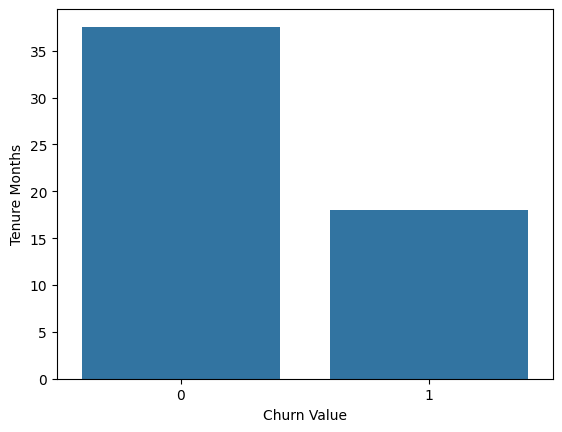

In [35]:
sns.barplot(data = df.groupby('Churn Value')[['Tenure Months']].mean(),
            x = 'Churn Value',
            y = 'Tenure Months')

plt.show()

**On average, those who have not churned have been with the company for longer than those who have churned** 

#### Phone Service

In [36]:
df.groupby(['Phone Service', 'Churn Value'])[['Churn Value']].count()

Churn Value
Phone Service Churn Value             
No            0                    512
              1                    170
Yes           0                   4662
              1                   1699

* No (682 customers):
    * 75% have not churned (**0**)
    * 25% have churned (**1**)
* Yes (6361 customers):
    * 73% have not churned (**0**)
    * 27% have churned (**1**)
* **Whether they have a phone service or not, the churn percentage is similar**

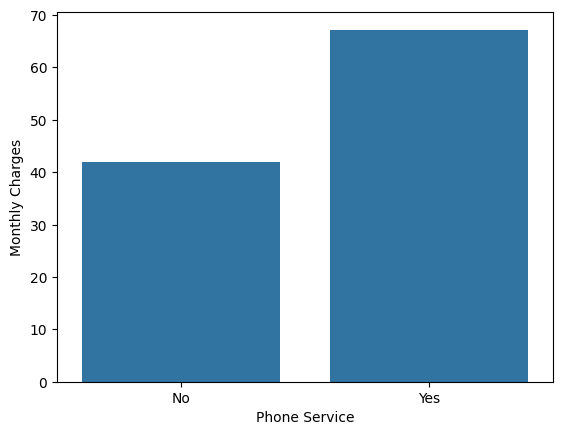

In [37]:
# Average monthly charges for each phone service
sns.barplot(data = df.groupby('Phone Service')[['Monthly Charges']].mean(),
           x = 'Phone Service',
           y = 'Monthly Charges')

plt.show()

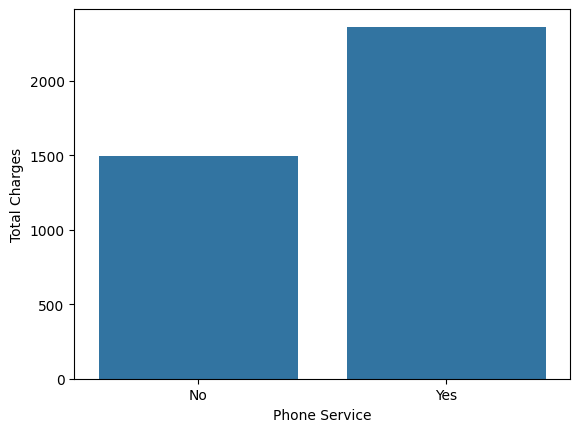

In [38]:
# Average total charges for each phone service
sns.barplot(data = df.groupby('Phone Service')[['Total Charges']].mean(),
           x = 'Phone Service',
           y = 'Total Charges')

plt.show()

**The charges for those with phone services are higher, however the majority of those with phone services have not churned**

#### Multiple Lines

In [39]:
df.groupby(['Multiple Lines', 'Churn Value'])[['Churn Value']].count()

Churn Value
Multiple Lines   Churn Value             
No               0                   2541
                 1                    849
No phone service 0                    512
                 1                    170
Yes              0                   2121
                 1                    850

* No (3390 customers):
    * 75% have not churned (**0**)
    * 25% have churned (**1**)
* Yes (2971 customers):
    * 71% have not churned (**0**)
    * 29% have churned (**1**)
* **Barely any difference for between multiple lines and non-multiple lines in terms of percenatge churned (on average)**

#### Internet Service

In [40]:
df.groupby(['Internet Service', 'Churn Value'])[['Churn Value']].count()

Churn Value
Internet Service Churn Value             
DSL              0                   1962
                 1                    459
Fiber optic      0                   1799
                 1                   1297
No               0                   1413
                 1                    113

* DSL (2421 customers):
    * 81% have not churned (**0**)
    * 19% have churned (**1**)
* Fiber Optic (3096 customers):
    * 58% have not churned (**0**)
    * 42% have churned (**1**)
* No (1526 customers):
    * 92% have not churned (**0**)
    * 8% have churned (**1**)
* **Those with Fiber Optic internet service have churned more than those with DSL or those without a internet service (on average)**

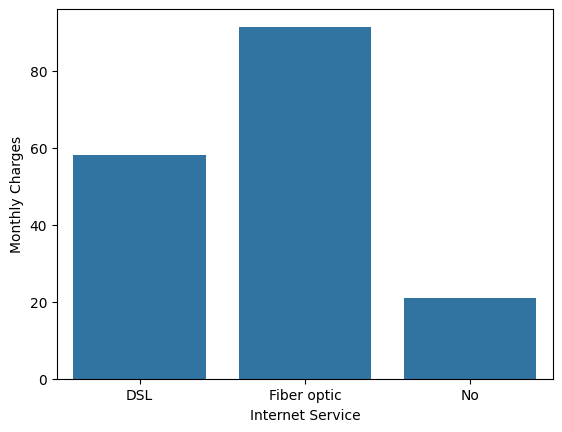

In [41]:
# Average monthly charges for each Internet Service
sns.barplot(data = df.groupby('Internet Service')[['Monthly Charges']].mean(),
           x = 'Internet Service',
           y = 'Monthly Charges')

plt.show()

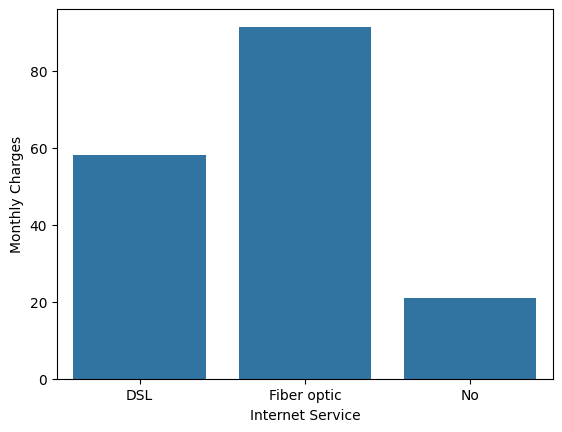

In [42]:
# Average total charges for each Internet Service
sns.barplot(data = df.groupby('Internet Service')[['Monthly Charges']].mean(),
           x = 'Internet Service',
           y = 'Monthly Charges')

plt.show()

**Those with Fiber Optic internet service have higher charges; this could be a reason for the higher churn rate**

#### Online Security

In [43]:
df.groupby(['Online Security', 'Churn Value'])[['Churn Value']].count()

Churn Value
Online Security     Churn Value             
No                  0                   2037
                    1                   1461
No internet service 0                   1413
                    1                    113
Yes                 0                   1724
                    1                    295

* No (3498 customers):
    * 58% have not churned (**0**)
    * 42% have churned (**1**)
* Yes (2019 customers):
    * 85% have not churned (**0**)
    * 15% have churned (**1**)
* **Those without online security have churned more than those without it (on average)** 👍

#### Online Backup

In [44]:
df.groupby(['Online Backup', 'Churn Value'])[['Churn Value']].count()

Churn Value
Online Backup       Churn Value             
No                  0                   1855
                    1                   1233
No internet service 0                   1413
                    1                    113
Yes                 0                   1906
                    1                    523

* No (3088 customers):
    * 60% have not churned (**0**)
    * 40% have churned (**1**)
* Yes (1526 customers):
    * 78% have not churned (**0**)
    * 22% have churned (**1**)
* **Those without online backup have churned more than those with it (on average)** 👍

#### Device Protection

In [45]:
df.groupby(['Device Protection', 'Churn Value'])[['Churn Value']].count()

Churn Value
Device Protection   Churn Value             
No                  0                   1884
                    1                   1211
No internet service 0                   1413
                    1                    113
Yes                 0                   1877
                    1                    545

* No (3095 customers):
    * 61% have not churned (**0**)
    * 39% have churned (**1**)
* Yes (2422 customers):
    * 77% have not churned (**0**)
    * 23% have churned (**1**)
* **Those without device protection have churned more than those without it (on average)** 👍

#### Tech Support

In [46]:
df.groupby(['Tech Support', 'Churn Value'])[['Churn Value']].count()

Churn Value
Tech Support        Churn Value             
No                  0                   2027
                    1                   1446
No internet service 0                   1413
                    1                    113
Yes                 0                   1734
                    1                    310

* No (3473 customers):
    * 58% have not churned (**0**)
    * 42% have churned (**1**)
* Yes (2044 customers):
    * 85% have not churned (**0**)
    * 15% have churned (**1**)
* **Those without tech support have churned more than those without (on average)** 👍

#### Streaming TV

In [47]:
df.groupby(['Streaming TV', 'Churn Value'])[['Churn Value']].count()

Churn Value
Streaming TV        Churn Value             
No                  0                   1868
                    1                    942
No internet service 0                   1413
                    1                    113
Yes                 0                   1893
                    1                    814

* No (2810 customers):
    * 66% have not churned (**0**)
    * 34% have churned (**1**)
* Yes (2707 customers):
    * 70% have not churned (**0**)
    * 30% have churned (**1**)
* **Similar percentage of those who churned between those with and without streaming tv**

#### Streaming Movies

In [48]:
df.groupby(['Streaming Movies', 'Churn Value'])[['Churn Value']].count()

Churn Value
Streaming Movies    Churn Value             
No                  0                   1847
                    1                    938
No internet service 0                   1413
                    1                    113
Yes                 0                   1914
                    1                    818

* No (2785 customers):
    * 66% have not churned (**0**)
    * 34% have churned (**1**)
* Yes (2732 customers):
    * 70% have not churned (**0**)
    * 30% have churned (**1**)
* **Similar percentage of those who churned between those with and without streaming tv**

#### Contracts

In [49]:
df.groupby(['Contract', 'Churn Value'])[['Churn Value']].count()

Churn Value
Contract       Churn Value             
Month-to-month 0                   2220
               1                   1655
One year       0                   1307
               1                    166
Two year       0                   1647
               1                     48

* Month to Month (3875 customers):
    * 45% have not churned (**0**)
    * 55% have churned (**1**)
* One Year (1473 customers):
    * 88% have not churned (**0**)
    * 12% have churned (**1**)
* Two Year (1695 customers):
    * 97% have not churned (**0**)
    * 3% have churned (**1**)
* **Those with longer contracts have churned less than those with shorter contracts (on average)**

## 1.4 FE Notes
* Dropped location columns apart from longitude and latitude (all other information is repeated)
* A lot of binary data --> needs mapping to 0's and 1's
* OHE needed for other categorical features
* Churn Reason column will be left out as it's needed more for the information deck

# 2. Train Test Splitting

In [50]:
# Seperating features and target

X = df.copy()

# Dropping these features based on the EDA
X.drop(columns = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Phone Service', 'Churn Label', 'Churn Value', 'Churn Reason'], inplace = True)

y = df['Churn Value'].copy()

In [51]:
X.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,33.964131,-118.272783,Male,No,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,34.059281,-118.307420,Female,No,No,Yes,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [52]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn Value, dtype: int64

In [53]:
# Doing the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12, stratify = y)

In [54]:
# Checks to see if lengths and indices are matching
def sanity_check(X, y):
    assert(len(X) == len(y)) , "Lengths dont match"
    assert(all(X.index == y.index)), "Indices dont match"
    return 'ALL GOOD'

In [55]:
sanity_check(X_train, y_train)

'ALL GOOD'

# 3. Feature Engineering

In [56]:
# Scaling
scale_cols = ['Latitude', 'Longitude', 'Monthly Charges', 'Total Charges', 'Tenure Months']
minmax = MinMaxScaler()
minmax.fit(X_train[scale_cols])

MinMaxScaler()

In [57]:
# Function which does all feature transformations

def fe(df):

    df_1 = df.copy()
    
    # Mapping
    df_1['Gender'] = df_1.Gender.map({'Female':0, 'Male':1, 0:0, 1:1})
    df_1['Senior Citizen'] = df_1['Senior Citizen'].map({'No':0, 'Yes':1, 0:0, 1:1})
    df_1['Partner'] = df_1.Partner.map({'No':0, 'Yes':1, 0:0, 1:1})
    df_1['Dependents'] = df_1.Dependents.map({'No':0, 'Yes':1, 0:0, 1:1})
    df_1['Paperless Billing'] = df_1['Paperless Billing'].map({'No':0, 'Yes':1, 0:0, 1:1})   

    # OHE
    ohe_columns = ['Payment Method',
                   'Contract',
                   'Internet Service',
                   'Multiple Lines',
                   'Online Security',
                   'Online Backup',
                   'Device Protection',
                   'Tech Support',
                   'Streaming TV',
                   'Streaming Movies']
    
    df_1 = pd.get_dummies(df_1, columns = ohe_columns, drop_first = True, dtype = int)

    # Scaling
    global minmax
    global scale_cols
    df_1[scale_cols] = minmax.transform(df_1[scale_cols])

    return df_1

In [58]:
# Applying feature transformation to X_train

X_train_fe = fe(X_train)

In [59]:
X_train_fe.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Total Charges,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_One year,Contract_Two year,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes
3138,0.144203,0.599952,0,1,0,0,0.027778,1,0.652888,0.018881,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3564,0.241523,0.524540,0,0,1,0,0.125000,1,0.471614,0.068431,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
275,0.585728,0.161825,0,0,0,0,0.138889,1,0.661853,0.095968,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5946,0.125445,0.641300,1,0,1,1,0.944444,0,0.264442,0.344131,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
1963,0.143119,0.622489,0,0,1,1,0.097222,0,0.323207,0.040409,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
# Sanity checks
sanity_check(X_train_fe, y_train)

'ALL GOOD'

# 4. Modelling

### 4.1 Normal Log Reg

In [61]:
# Creating an empty logistic regression model
log_reg = LogisticRegression(max_iter = 32, random_state = 42)

# Fitting it on the training set
model = log_reg.fit(X_train_fe, y_train)

In [62]:
# Getting the training set accuracy
model.score(X_train_fe, y_train)

0.8115015974440895

In [63]:
# Applying feature engineering on the test set
X_test_fe = fe(X_test)
sanity_check(X_test_fe, y_test)

'ALL GOOD'

In [64]:
# Getting the accuracy on the test set
model.score(X_test_fe, y_test)

0.8176011355571328

### 4.2 Removing columns whilst still mainting accuracy

In [65]:
# After trial and error these were the optimal columns to remove
def rem(df):
    df_1 = df.copy()
    df_1.drop(columns = ['Gender', 'Longitude',
                         'Payment Method_Credit card (automatic)', 
                         'Payment Method_Electronic check', 
                         'Payment Method_Mailed check'], inplace = True)
    return df_1

In [66]:
# Removing the columns from the training set
X_new_train = rem(X_train_fe)
sanity_check(X_new_train, y_train)

'ALL GOOD'

In [67]:
# Creating an empty log reg model
log_reg2 = LogisticRegression(max_iter = 32, random_state = 42)

# Fitting the model on the new, removed X_train
model2 = log_reg2.fit(X_new_train, y_train)

In [68]:
# Getting the acuracy on the training set
model2.score(X_new_train, y_train)

0.8095491657791978

In [69]:
# Removing the columns from the test set
X_new_test = X_test_fe.copy()
X_new_test = rem(X_test_fe)

In [70]:
# Getting the accuracy on the test set
model2.score(X_new_test, y_test)

0.8176011355571328

**Accuracy is maintained** 👍

### 4.3 Grid Search to get optimal model using the removed columns

In [71]:
# Creating an empty log reg model
log_reg3 = LogisticRegression(max_iter = 32, random_state = 42)

In [72]:
# The different parameters we are iterating through
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [50, 100, 1000],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [73]:
# Applying grid search on the removed training set
grid_search = GridSearchCV(log_reg3, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_new_train, y_train)

c:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_rati

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=32, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [50, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy')

In [74]:
# Checking the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 0.001, 'max_iter': 50, 'penalty': None}


In [75]:
# Fitting the best model to the training set
best_model = grid_search.best_estimator_
best_model.fit(X_new_train, y_train)

# Evaluating on the training set
accuracy_train = best_model.score(X_new_train, y_train)
print(f"Accuracy on train set: {accuracy_train}")

# Evaluating on the test set
accuracy_test = best_model.score(X_new_test, y_test)
print(f"Accuracy on test set: {accuracy_test}")

Accuracy on train set: 0.8095491657791978
Accuracy on test set: 0.8232789212207239


c:\Users\rahul\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


**82% is the best accuracy**

Grid Search was done with the help of these websites [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [here](https://www.geeksforgeeks.org/machine-learning/sklearn-model-hyper-parameters-tuning/)

# 5. Churn Risks

In [76]:
# Creating a dataframe of non-churner
no_churn = df.loc[df['Churn Value'] == 0]

In [77]:
# Feature Engineering on the no_churn dataframe

X_nc = no_churn.copy()
X_nc.drop(columns = ['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Phone Service', 'Churn Label', 'Churn Value', 'Churn Reason'], inplace = True)

y_nc = no_churn['Churn Value'].copy()

X_nc_fe = fe(X_nc)

X_nc_fe = rem(X_nc_fe)


In [78]:
X_nc_fe.head()

,Latitude,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Total Charges,Contract_One year,Contract_Two year,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes
1869,0.150728,0,1,0,0.013889,1,0.115538,0.003443,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1870,0.148138,0,0,0,0.472222,0,0.385458,0.217933,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1871,0.161640,0,0,0,0.625000,0,0.239542,0.212310,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
1872,0.156439,0,0,1,0.305556,1,0.705677,0.224842,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1873,0.154414,0,0,0,0.138889,0,0.114542,0.034821,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [79]:
sanity_check(X_nc_fe, y_nc)

'ALL GOOD'

In [80]:
# Predicting probability of not churning and churning
best_model.predict_proba(X_nc_fe)

array([[0.31770699, 0.68229301],
       [0.95223671, 0.04776329],
       [0.96597849, 0.03402151],
       ...,
       [0.94271798, 0.05728202],
       [0.81788425, 0.18211575],
       [0.94453396, 0.05546604]], shape=(5174, 2))

In [81]:
# Getting the probabilities on a new dataframe
new_X_nc_fe = X_nc_fe.copy()
new_X_nc_fe[['prob_not_churn', 'prob_churn']] = best_model.predict_proba(X_nc_fe)
new_X_nc_fe.head()

,Latitude,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Total Charges,Contract_One year,Contract_Two year,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,prob_not_churn,prob_churn
1869,0.150728,0,1,0,0.013889,1,0.115538,0.003443,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.317707,0.682293
1870,0.148138,0,0,0,0.472222,0,0.385458,0.217933,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.952237,0.047763
1871,0.161640,0,0,0,0.625000,0,0.239542,0.212310,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0.965978,0.034022
1872,0.156439,0,0,1,0.305556,1,0.705677,0.224842,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.757044,0.242956
1873,0.154414,0,0,0,0.138889,0,0.114542,0.034821,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.636358,0.363642


In [82]:
# Getting the final prediction with a cutoff point of 0.7
new_X_nc_fe['y_pred'] = np.where(new_X_nc_fe['prob_not_churn'] >= 0.7, 0, 1)
new_X_nc_fe.head()

,Latitude,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Total Charges,Contract_One year,Contract_Two year,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,prob_not_churn,prob_churn,y_pred
1869,0.150728,0,1,0,0.013889,1,0.115538,0.003443,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.317707,0.682293,1
1870,0.148138,0,0,0,0.472222,0,0.385458,0.217933,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.952237,0.047763,0
1871,0.161640,0,0,0,0.625000,0,0.239542,0.212310,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0.965978,0.034022,0
1872,0.156439,0,0,1,0.305556,1,0.705677,0.224842,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.757044,0.242956,0
1873,0.154414,0,0,0,0.138889,0,0.114542,0.034821,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.636358,0.363642,1


In [83]:
# Creating a dataframe of those most likely to churn

# Creating a dataframe with just customer id
cus_id = no_churn[['CustomerID']].copy()

# Merging customer id with the new no-churn dataframe
result = pd.merge(new_X_nc_fe, cus_id, on = cus_id.index)

In [84]:
result.head()

,key_0,Latitude,Senior Citizen,Partner,Dependents,Tenure Months,Paperless Billing,Monthly Charges,Total Charges,Contract_One year,Contract_Two year,Internet Service_Fiber optic,Internet Service_No,Multiple Lines_No phone service,Multiple Lines_Yes,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,prob_not_churn,prob_churn,y_pred,CustomerID
0,1869,0.150728,0,1,0,0.013889,1,0.115538,0.003443,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.317707,0.682293,1,7590-VHVEG
1,1870,0.148138,0,0,0,0.472222,0,0.385458,0.217933,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.952237,0.047763,0,5575-GNVDE
2,1871,0.161640,0,0,0,0.625000,0,0.239542,0.212310,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0.965978,0.034022,0,7795-CFOCW
3,1872,0.156439,0,0,1,0.305556,1,0.705677,0.224842,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.757044,0.242956,0,1452-KIOVK
4,1873,0.154414,0,0,0,0.138889,0,0.114542,0.034821,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.636358,0.363642,1,6713-OKOMC


In [85]:
# Creating the full list dataframe
full_list = result[['CustomerID', 'prob_churn', 'prob_not_churn', 'y_pred']].copy()

In [86]:
full_list = full_list.sort_values(by = 'prob_churn', ascending = False)

In [87]:
full_list.head()

,CustomerID,prob_churn,prob_not_churn,y_pred
2329,5150-ITWWB,0.827629,0.172371,1
698,6630-UJZMY,0.827485,0.172515,1
2755,3489-HHPFY,0.824542,0.175458,1
20,4929-XIHVW,0.809899,0.190101,1
1863,4927-WWOOZ,0.808193,0.191807,1


In [88]:
# Importing it into a csv
full_list.to_csv('full_list.csv')

In [89]:
# Creating the top 500 dataframe
top_500 = full_list.head(500)

In [90]:
len(top_500)

500

In [91]:
# Importing it into a csv
top_500.to_csv('top_500.csv')